# Merging Directors and Ratings table

In [1]:
# The core libraries
import numpy as np
import pandas as pd
import sqlite3
# Visualization labraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# For data cleaning 
from datetime import datetime # For date parsing
import re   # For regular expressions (cleaning strings, removing symbols)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Accessing the IMDb data
conn = sqlite3.connect("im.db")
df_IMDB_table = pd.read_sql("""
SELECT name 
FROM sqlite_master 
WHERE type = 'table'
;""",conn)

df_IMDB_table 

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
# Load director table
df_dir = pd.read_sql("""
SELECT *
FROM directors
;""",conn)
df_dir

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [4]:
# Load persons table
df_persons = pd.read_sql("""
SELECT *
FROM persons
;""",conn)
df_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [5]:
# Load ratings table
df_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
;""",conn)
df_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
# Merge directors and ratings table
df_merged = pd.merge(df_dir, df_ratings, on='movie_id', how='inner')
df_merged

,movie_id,person_id,averagerating,numvotes
0,tt0285252,nm0899854,3.9,219
1,tt0462036,nm1940585,5.5,18
2,tt0835418,nm0151540,5.0,8147
3,tt0835418,nm0151540,5.0,8147
4,tt0878654,nm0089502,5.8,875
...,...,...,...,...
181384,tt8948614,nm0839064,7.4,696
181385,tt8954732,nm0737517,6.0,13993
181386,tt8954732,nm0737517,6.0,13993
181387,tt8991416,nm7731173,6.7,13


In [7]:
# merging everything together
df_merged1 = pd.merge(df_merged, df_persons, on='person_id', how='inner')
df_merged1

,movie_id,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0285252,nm0899854,3.9,219,Tony Vitale,1964.0,NaN,"producer,director,writer"
1,tt0462036,nm1940585,5.5,18,Bill Haley,NaN,NaN,"director,writer,producer"
2,tt0835418,nm0151540,5.0,8147,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
3,tt0835418,nm0151540,5.0,8147,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
4,tt0878654,nm0089502,5.8,875,Albert Pyun,1954.0,NaN,"director,writer,producer"
...,...,...,...,...,...,...,...,...
181382,tt8948614,nm0839064,7.4,696,Anne Sundberg,NaN,NaN,"producer,director,writer"
181383,tt8954732,nm0737517,6.0,13993,Mike Rohl,NaN,NaN,"director,assistant_director,producer"
181384,tt8954732,nm0737517,6.0,13993,Mike Rohl,NaN,NaN,"director,assistant_director,producer"
181385,tt8991416,nm7731173,6.7,13,Richard Squires,NaN,NaN,"director,animation_department,editor"


In [8]:
# Check for null values
df_merged1.isnull().sum()

movie_id                   0
person_id                  0
averagerating              0
numvotes                   0
primary_name               0
birth_year            126582
death_year            180045
primary_profession       125
dtype: int64

In [9]:
# Drop null values
df_merged1 = df_merged1.dropna(subset = ['primary_profession'])

In [10]:
# drop columns with most null values and are not needed
df_merged1 = df_merged1.drop(columns = ['birth_year', 'death_year'])
df_merged1

,movie_id,person_id,averagerating,numvotes,primary_name,primary_profession
0,tt0285252,nm0899854,3.9,219,Tony Vitale,"producer,director,writer"
1,tt0462036,nm1940585,5.5,18,Bill Haley,"director,writer,producer"
2,tt0835418,nm0151540,5.0,8147,Jay Chandrasekhar,"director,actor,writer"
3,tt0835418,nm0151540,5.0,8147,Jay Chandrasekhar,"director,actor,writer"
4,tt0878654,nm0089502,5.8,875,Albert Pyun,"director,writer,producer"
...,...,...,...,...,...,...
181382,tt8948614,nm0839064,7.4,696,Anne Sundberg,"producer,director,writer"
181383,tt8954732,nm0737517,6.0,13993,Mike Rohl,"director,assistant_director,producer"
181384,tt8954732,nm0737517,6.0,13993,Mike Rohl,"director,assistant_director,producer"
181385,tt8991416,nm7731173,6.7,13,Richard Squires,"director,animation_department,editor"


In [11]:
df_merged1.isnull().sum()

movie_id              0
person_id             0
averagerating         0
numvotes              0
primary_name          0
primary_profession    0
dtype: int64

*On the next part, we grouped directors by 'person_id' and 'primary_name' but we first made sure that at the 'primary_profesion' they had the title director* 

In [12]:
# Checking if director is included in the 'primary_profession'
directors_only = df_merged1[df_merged1['primary_profession'].str.contains('director', na = False)]

In [13]:
# Group directors by 'person_id' and 'primary_name'
grouped = directors_only.groupby(['person_id', 'primary_name']).agg({
    'averagerating': 'mean',
    'numvotes': 'sum'}).reset_index()

In [14]:
# Check the top rated director
top_rated_directors = grouped.sort_values(by = 'averagerating', ascending = False).head(10)
top_rated_directors

,person_id,primary_name,averagerating,numvotes
45503,nm6893562,Chad Carpenter,10.0,5
11599,nm10616933,Ivana Diniz,10.0,10
50138,nm8791543,Emre Oran,10.0,6
33423,nm4166962,Daniel Alexander,10.0,5
30556,nm3704168,Michiel Brongers,10.0,5
36164,nm4637768,Masahiro Hayakawa,10.0,5
46433,nm7223265,Loreto Di Cesare,10.0,16
47499,nm7633303,Lindsay Thompson,10.0,7
10962,nm10174241,Andrew Jezard,9.9,8
8368,nm0768620,Raphael Sbarge,9.9,8


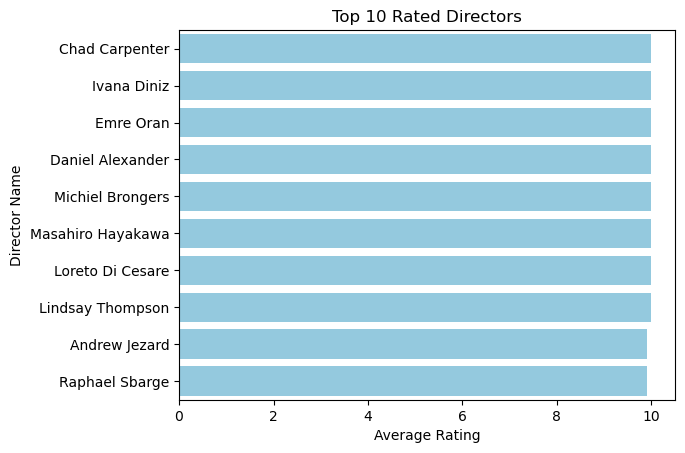

In [15]:
# plot the top rated directors bargrapgh
sns.barplot(data = top_rated_directors, x ='averagerating', y ='primary_name', color = 'skyblue')

plt.title('Top 10 Rated Directors')
plt.xlabel('Average Rating')
plt.ylabel('Director Name')
plt.tight_layout
plt.show()

In [16]:
# Check the least rated directors
least_rated_directors = grouped.sort_values(by = 'averagerating', ascending = True).head(10)
least_rated_directors

,person_id,primary_name,averagerating,numvotes
31351,nm3827839,Shinsuke Kurimoto,1.0,1796
24507,nm2764740,Eric McCoy,1.0,352
34683,nm4371526,Charlie Chu,1.0,67
31611,nm3865678,Imraan Ismail,1.0,342
27623,nm3279029,Simon Pennekamp,1.0,342
42226,nm5886503,Shih-Han Tsao,1.0,16
31291,nm3819164,Nicola Barbour,1.0,352
37731,nm4923064,Kenta Matsuo,1.0,1756
50172,nm8809512,Erik Alarik,1.0,8
37733,nm4923072,Akihiro Mima,1.0,1756


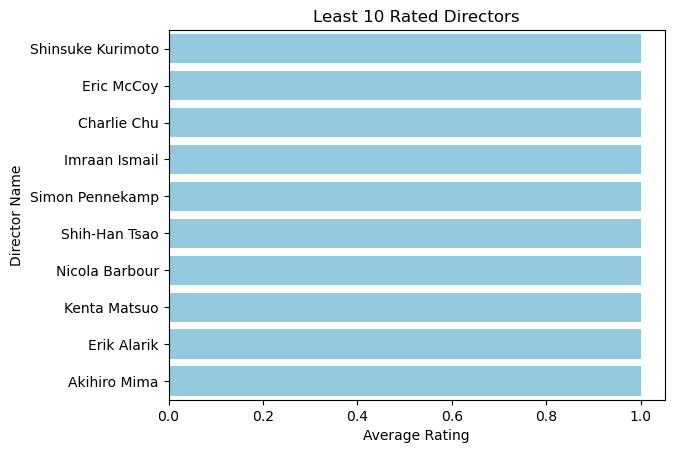

In [17]:
# Plot the least rated directors bargrapgh
sns.barplot(data = least_rated_directors, x ='averagerating', y ='primary_name', color = 'skyblue')

plt.title('Least 10 Rated Directors')
plt.xlabel('Average Rating')
plt.ylabel('Director Name')
plt.tight_layout
plt.show()

In [18]:
# Check the top voted directors bargraph
top_voted_directors = grouped.sort_values(by = 'numvotes', ascending = False).head(10)
top_voted_directors

,person_id,primary_name,averagerating,numvotes
4000,nm0348181,James Gunn,6.266667,18640459
8169,nm0751648,Joe Russo,8.246667,18421593
8167,nm0751577,Anthony Russo,8.246667,18421593
8844,nm0811583,Zack Snyder,6.619231,10576977
6996,nm0634240,Christopher Nolan,8.437500,10457390
9715,nm0891216,Matthew Vaughn,7.500000,9962120
145,nm0001392,Peter Jackson,7.743750,8634677
6482,nm0588087,Christopher Miller,7.421053,6565719
5844,nm0520488,Phil Lord,7.421053,6565719
3,nm0000110,Kenneth Branagh,6.850000,6454844


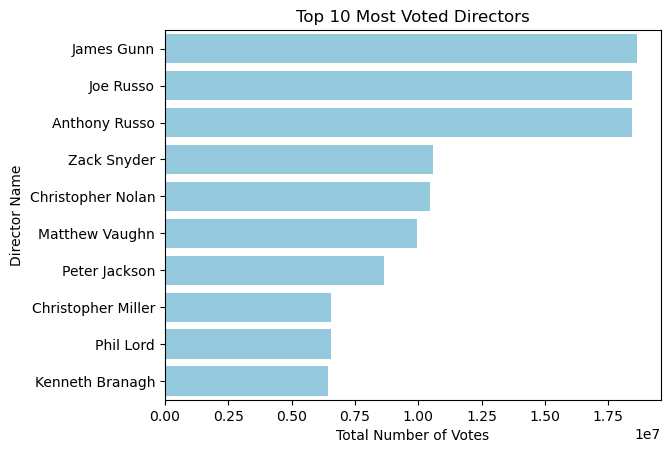

In [19]:
# plot the top voted directors 
sns.barplot(data = top_voted_directors, x ='numvotes', y ='primary_name', color= 'skyblue')

plt.title('Top 10 Most Voted Directors')
plt.xlabel('Total Number of Votes')
plt.ylabel('Director Name')
plt.tight_layout
plt.show()

In [20]:
# checking average rates each director got
df_director_rating = df_merged1.groupby('person_id')['averagerating'].mean().reset_index()
df_director_rating.sort_values(by = 'averagerating', ascending = False)

,person_id,averagerating
51416,nm7223265,10.0
37574,nm4166962,10.0
32016,nm3388005,10.0
50454,nm6893562,10.0
12990,nm10616933,10.0
...,...,...
50712,nm6979451,1.0
50711,nm6979450,1.0
53185,nm7907762,1.0
55235,nm8809512,1.0


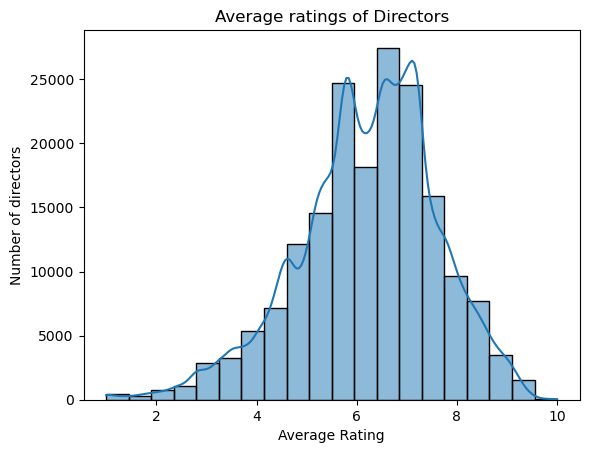

In [21]:
sns.histplot(df_merged1['averagerating'], bins=20, kde=True)

plt.title('Average ratings of Directors')
plt.xlabel('Average Rating')
plt.ylabel('Number of directors')
plt.show()
           

*Observation : Most directors got an average rate of 6.5 to 6.9*